Na perspectiva de análise da relação de homens e mulheres, considerando o conjunto de alunos que abandonaram o curso, o evento de interese vai ser se ele é homen, já o evento de "fracasso" vai ser se o evento é mulher, uma variável discreta. O evento de "fracasso" não necessariamente é uma hipótese ruim, apenas para modelarmos o problema em distribuições da estatística classica. 

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import binom

from math import prod
from itertools import permutations

from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/xGabrielR/Analise-de-Sobrevivencia-Aplicada-a-Evasao-Escolar/refs/heads/main/dataset/data.csv")
df.columns = ['ingresso', 'genero', 'idade', 'n_aprovacoes', 'n_reprovacoes', 'tempo', 'censura', 'ano_ingresso']
df = df[df["censura"] == 1]

print(df["genero"].value_counts())
print(df["genero"].value_counts() / df.shape[0])

df.describe().T

genero
1    73
2    31
Name: count, dtype: int64
genero
1    0.701923
2    0.298077
Name: count, dtype: float64


,count,mean,std,min,25%,50%,75%,max
ingresso,104.0,1.346154,0.747413,1.0,1.0,1.0,1.00,5.0
genero,104.0,1.298077,0.459629,1.0,1.0,1.0,2.00,2.0
idade,104.0,22.951923,5.604055,17.0,19.0,21.0,26.00,42.0
n_aprovacoes,104.0,1.721154,1.759616,0.0,0.0,1.0,3.00,6.0
n_reprovacoes,104.0,1.951923,1.609316,0.0,1.0,2.0,3.00,6.0
tempo,104.0,5.173077,3.850211,1.0,3.0,4.0,6.25,20.0
censura,104.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
ano_ingresso,104.0,88.971154,2.954203,85.0,86.0,89.0,91.00,95.0


Levando em conta a distribuição binomial, descrita pela fórmula:

$$  p(x) = \frac{n!}{(n-x)!x!} p^{x} (1 - p)^{n - x} $$

Onde o termo fatorial descreve as combinações possíveis dos n elementos tomados x em x, e multiplicado pelas suas respectivas probabilidades do evento de sucesso e do evento de fracasso.

Em outras palavras, o valor de $N$ é o tamanho da amostra, o valor de $X$ sãos as variáveis aleatórias do estudo, p a probabilidade de sucesso e $1 - p$ a probabilidade de fracasso, ou seja, o complementar.

Considerando esse exemplo abaixo:

Uma amostra de 4 pessoas foi coletada a fim de identificar se são a favor ou não de um determinado projeto da cidade, o evento de sucesso é ser favorável.

Com o valor de n = 4, podemos combinar esses quatro amostras, isto é, S = {NNNN, SNNN, NSNN, NNSN, NNNS, SSNN, SNSN, SNNS, NSSN, NSNS, NNSS, SSSN, SSNS, SNSS, NSSS, SSSS}. Podemos quebrar esse espaço amostras em sub espaços.

- Nenhum evento de sucesso: $S_1 = { NNNN }$.
- Apenas um evento de sucesso: $S_2 = { SNNN, NSNN, NNSN, NNNS }$.
- Apenas dois evento de sucesso: $S_3 = { SSNN, SNSN, SNNS, NSSN, NSNS, NNSS }$.
- Apenas três evento de sucesso: $S_4 = { SSSN, SSNS, SNSS, NSSS }$.
- Apenas quatro evento de sucesso: $S_5 = { SSSS }$.

Repare que para os espaços amostrais de $S_1$ E $S_4$, existem apenas uma possível solução, ou são todos a favor ou são todos contra, então não existe combinação dos elementos, é uma permutação de 4 elementos com 4 repetidos.

Se $\pi$ for a probabilidade de ser favorável, temos:

- $\pi^{n} => \pi^{4}$ é a probabilidade de todos os elementos amostrados serem favoráveis, ou seja, o espaço amostral $S_5$.
- $(1 - \pi)^{n} => (1 - \pi)^{4}$ é a probabilidade de todos os elementos amostrados NÃO serem favoráveis, ou seja, o espaço amostral $S_1$. 

Já para os espaços amostrais $S_2$ e $S_4$, existem combinações de elementos, em outras palavras, o espaço amostral $S_2$ nada mais é que, nessas 4 amostras coletadas, existe um elemento que é favorável, os demais não são favoraveis a proposta, aqui vem o pulo do gato, qual amostra que é de fato favorável - pode ser o primeiro, o segundo, o terceiro ou o quarto elemento amostral. Para levar em conta essa combinação de amostras, faz-se o uso da ferramenta matemática chamada de combinação.

A função abaixo nada mais é que a fórmula da distribuição binomial criada manualmente em python.

In [5]:
def binomial(x, n, p):
    if x > n:
        raise ValueError("X precisa ser menor que N")

    else:
        combinations = list(set(permutations([["S"] * x + ["F"] * (n - x) ][0], n)))
        probability_combinations = list(set(permutations([[p] * x + [1 - p] * (n - x) ][0], n)))

        probability = sum([prod(prob_combination) for prob_combination in probability_combinations])

    return probability, combinations, probability_combinations

Para nosso estudo, a probabilidade de ser homen é 0.7, já a probabilidade de ser mulher é 0.3, arredondando.

Qual é a probabilidade de em uma amostra aleatória de 4 pessoas, exatamente três sejam homens ? 

In [6]:
n = 4
x = 3
p = 0.7

probability, combinations, probability_combinations = binomial(x, n, p)

print(f"Probability:", probability)
print(f"Combinations:", combinations)

Probability: 0.41159999999999997
Combinations: [('S', 'S', 'F', 'S'), ('S', 'S', 'S', 'F'), ('S', 'F', 'S', 'S'), ('F', 'S', 'S', 'S')]


É possível obter essas probabilidades nas funções PMF ("Probability Mass Function") e CDF ("Cumulative Distribution Function").

Para um valor exato, isto é, exatamente três homens basta utilizar a função de massa.

In [7]:
binom.pmf(k=x, n=n, p=p)

0.41160000000000024

Já para os valores acumulados, ou seja, 0, 1, 2 e 3 homens, basta utilizar a função cdf.

Para nosso exemplo da função binomial descrita anteriormente, basta calcular de 0 até 3 e somar as probabilidades.

In [8]:
binom.cdf(k=x, n=n, p=p)

0.7599

In [9]:
sum([i[0] for i in [binomial(x=xi, n=n, p=p) for xi in [0, 1, 2, 3]]])

0.7599

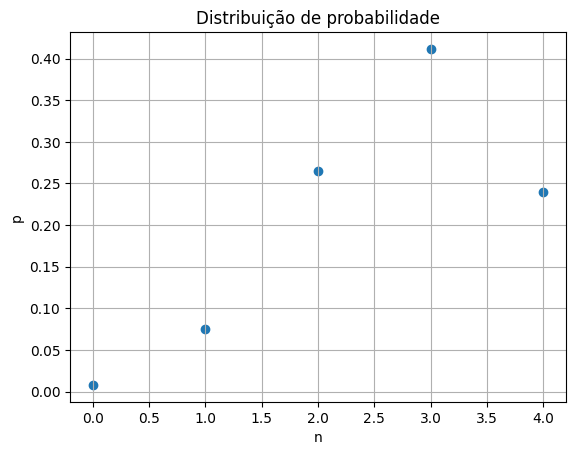

In [10]:
samples = range(0, n + 1)
probas = [i[0] for i in [binomial(x=xi, n=n, p=p) for xi in samples]]

fig, ax = plt.subplots()
ax.scatter(x=samples, y=probas)
ax.set_ylabel("p")
ax.set_xlabel("n")
ax.set_title("Distribuição de probabilidade")
ax.grid(2);

Em uma amostra aleatória de 4 pessoas:

- Qual é a probabilidade de todos serem homens ?
- Qual é a probabilidade de todos serem mulheres ?
- Qual é a probabilidade de exatamente uma mulher ?
- Qual é a probabilidade de pelo menos um homem ?


In [11]:
print(f"Probabilidade todos homens: {binom.pmf(k=4, n=n, p=p):.3f}")
print(f"Probabilidade todos mulheres: {binom.pmf(k=0, n=n, p=p):.3f}")
print(f"Probabilidade exatamente uma mulher: {binom.pmf(k=3, n=n, p=p):.3f}")

Probabilidade todos homens: 0.240
Probabilidade todos mulheres: 0.008
Probabilidade exatamente uma mulher: 0.412


In [12]:
probability = sum([i[0] for i in [binomial(x=xi, n=n, p=p) for xi in [1, 2, 3, 4]]])

print(f"Probabilidade de pelo menos um homen: {probability:.3f}")

Probabilidade de pelo menos um homen: 0.992


Realizando simulações de monte carlo utilizando a distribuição binomial também conseguimos identificar as probabilidades de cada um dos experimentos, levando em conta a chance de sucesso.
Esse método também é chamado de "monte carlo frequentista".

In [13]:
ds = pd.DataFrame(
    {"sims": np.random.binomial(n=n, p=p, size=10_000)}
)

ds.value_counts() / len(ds)

sims
3       0.4139
2       0.2652
4       0.2328
1       0.0786
0       0.0095
Name: count, dtype: float64

Então, se você escolher 4 alunos aleatoriamente:

- Há cerca de 41% de chance de que 3 deles sejam homens.
- Aproximadamente 26% de chance de que 2 sejam homens.
- Aproximadamente 24% de chance de que todos os 4 sejam homens.
- Uma chance muito pequena (<1%) de que nenhum seja homem.

O valor esperado corresponde à intuição. A média teórica é: $E[X] = n * p= 4  * 0.7 = 2.8.$

Em média, em 4 desistências aleatórias, espera-se cerca de 3 homens.

Na amostra de 150 alunos, 104 são alunos censurados, ou seja, que abandonaram o curso, 73 são alunos do genero masculino que abandonaram o curso.

In [14]:
n = 104
s = 73
f = 31

p_hat = s / n
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci_low, ci_high = p_hat - 1.96 * se, p_hat + 1.96 * se

print(f"p estimado: {p_hat:.3f}")
print(f"Erro padrão: {se:.3f}")
print(f"95% Intervalo de confianca de p: ({ci_low:.3f}, {ci_high:.3f})")

p estimado: 0.702
Erro padrão: 0.045
95% Intervalo de confianca de p: (0.614, 0.790)
